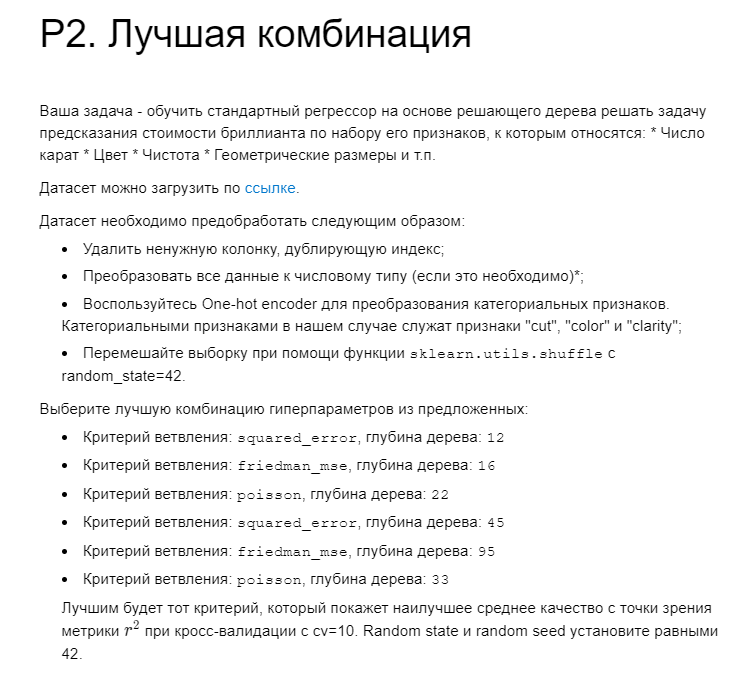

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import sklearn as sk
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

np.random.seed(42)
df = pd.read_csv('/content/drive/MyDrive/Copy of TRAIN.csv')
del df[df.columns[0]]
orig1 = df.cut.unique()
orig2 = df.color.unique()
orig3 = df.clarity.unique()

le = LabelEncoder()
repl1 = le.fit_transform(df.cut.unique())
repl2 = le.fit_transform(df.color.unique())
repl3 = le.fit_transform(df.clarity.unique())
df = df.replace(orig1[:], repl1[:])
df = df.replace(orig2[:], repl2[:])
df = df.replace(orig3[:], repl3[:])

df = sk.utils.shuffle(df, random_state = 42)

X,y = df.drop('price', axis=1), df['price']
def solution(score, depth):
    clf = DecisionTreeRegressor(criterion=score, max_depth=depth, random_state=42)
    score = np.mean(cross_val_score(clf, X, y, cv=10, scoring='r2'))
    return score

results = []
results.append(solution('friedman_mse', 16))
results.append(solution('squared_error', 12))
results.append(solution('poisson', 22))
results.append(solution('squared_error', 45))
results.append(solution('friedman_mse', 95))
results.append(solution('poisson', 33))
print(results)
num = np.argmax(results)

print(num)

[0.9698124638578074, 0.974376370315037, 0.9649735951477197, 0.9657305223646757, 0.9657260061669289, 0.9644969400198521]
1
